In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)

In [2]:
from pathlib import Path, PureWindowsPath
path = PureWindowsPath(os.path.dirname(os.getcwd()) + "\\data\\data.parquet")
path = path.as_posix()
corpus = pd.read_parquet(path) #engine="fastparquet"
# corpus = pd.read_parquet(os.path.dirname(path), engine="fastparquet")

In [3]:
corpus["id"] = list(range(len(corpus)))
corpus = corpus.sort_values("id")
corpus

,id,message,message_preprocessed,category,length
index,,,,,
0,0,Nous avons vu [quoi est Dieu](https://parlafoi.fr/2019/0...,vu quoi dieuhttpsparlafoifrles-cinq-voies- de-thomas-daq...,philosophy,667
1,1,Peut-il faire que les choses passées n’aient pas été ? Non.,peut-il faire chose passée non,philosophy,59
2,2,Peut-il faire les choses qu’il ne fait pas ou omettre ce...,peut-il faire chose fait omettre celles fait oui,philosophy,78
3,3,## Article 1 : Y-a-t-il en Dieu de la puissance ?,article y-a-t-il dieu puissance,philosophy,49
4,4,> On dit dans le psaume 89.9 : « Tu es Puissant Seigneur...,dit psaume « puissant seigneur vérité entoure » thomas a...,philosophy,124
...,...,...,...,...,...
8223,8223,Le baptême ne peut être administré que par un pasteur ou...,baptême peut être administré pasteur a commission dès se...,baptism,832
8224,8224,[![Quand Dieu promet que nos enfants font partie de la N...,quand dieu promet enfant font partie nouvelle allianceht...,baptism,274
8225,8225,## [Quand Dieu promet que nos enfants font partie de la ...,quand dieu promet enfant font partie nouvelle allianceht...,baptism,178


In [5]:
#Verifier qu'il n'y a pas d'id en doublon
print(corpus.id.duplicated().any())
print(corpus.index.duplicated().any())

False
False


(0.0, 600.0)

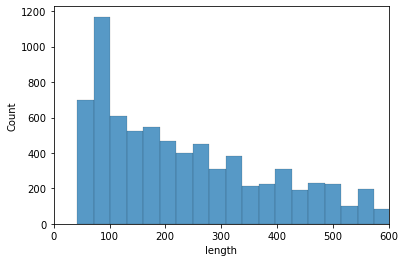

In [5]:
sb.histplot(data=corpus, x="length")
plt.xlim(0, 600)

In [6]:
X = corpus["message_preprocessed"]
y = corpus["category"]

In [7]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X)

# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [8]:
# Methode 2 : TfidfVectorizer (CountVectorizer + TfidfTransformer en meme temps)
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(X)
tfidf_vect.get_feature_names_out()

array(['aaaayaajpgpadqthechildofthecovenantorhowchristianparentsshouldtrainuptheirhouseholds',
       'aaen', 'aaron', ..., 'טבל', 'יהוה', 'ἔθνη'], dtype=object)

# Reduction de dimensions pour potentiellement observer des clusters

In [9]:
print("number of dimensions at the beginninig =", X_tfidf.shape)

number of dimensions at the beginninig = (8228, 12950)


TruncatedSVD

In [10]:
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
svd.fit(X_tfidf)

TruncatedSVD(n_components=50, n_iter=7, random_state=42)

In [11]:
print(svd)

TruncatedSVD(n_components=50, n_iter=7, random_state=42)


In [12]:
print(svd.explained_variance_ratio_)

print(svd.explained_variance_ratio_.sum() * 100)

print(svd.singular_values_)

[0.02214204 0.02849171 0.01336819 0.01472108 0.01406072 0.01338853
 0.01105526 0.00972424 0.00990406 0.00944134 0.00910863 0.00894204
 0.00857061 0.00832532 0.00776985 0.00756577 0.00754262 0.00751287
 0.00739972 0.00718058 0.00702441 0.00674667 0.00657273 0.00644061
 0.00639934 0.00629671 0.00613635 0.00595706 0.00596562 0.00576104
 0.00563067 0.00552652 0.00550686 0.00535603 0.0051754  0.00505772
 0.00498611 0.00478817 0.00473083 0.00444365 0.00424923 0.00403142
 0.00391575 0.00356473 0.00344031 0.00327085 0.00322189 0.00321166
 0.00312343 0.00286322]
37.561015626925794
[17.82468612 15.313556   11.66360612 10.88488949 10.72223222 10.40073305
  9.50216317  9.12775189  8.9241919   8.73023252  8.62541223  8.49764184
  8.30032523  8.19687033  7.90363219  7.89231657  7.80032949  7.77683297
  7.73149305  7.59755524  7.51597253  7.36439978  7.26880877  7.19567908
  7.17590934  7.11501974  7.02314316  6.93569973  6.92963247  6.80958314
  6.73059326  6.7136569   6.656341    6.56142982  6.4509

TSNE

In [13]:
X_tfidf.shape
X_tfidf[:100,:]

<100x12950 sparse matrix of type '<class 'numpy.float64'>'
	with 2053 stored elements in Compressed Sparse Row format>

In [14]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, verbose=1)
tsne_results = tsne.fit_transform(X_tfidf[:100,:])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.264669
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.122452
[t-SNE] KL divergence after 1000 iterations: 0.522885


In [15]:
type(tsne_results)

numpy.ndarray

In [16]:
#corpus["tsne_2d_x"] = tsne_results[:,0]
#corpus["tsne_2d_y"] = tsne_results[:,1]
corpus_100 = corpus.iloc[0:100]
corpus_100["tsne_2d_x"] = tsne_results[:,0]
corpus_100["tsne_2d_y"] = tsne_results[:,1]

/tmp/ipykernel_17256/2107626130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_100["tsne_2d_x"] = tsne_results[:,0]
/tmp/ipykernel_17256/2107626130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_100["tsne_2d_y"] = tsne_results[:,1]


In [ ]:
plt.figure(figsize=(16,10))
sb.scatterplot(
    x="tsne_2d_x", y="tsne_2d_y",
    hue="category",
    palette=sb.color_palette("hls", 2),
    data=corpus_100,
    legend="auto",
    alpha=0.3
)

<AxesSubplot:xlabel='tsne_2d_x', ylabel='tsne_2d_y'>

In [ ]:
plt.show()

In [ ]:
X_embedded

In [ ]:
# clustering
# 1. K means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X_tfidf)
